In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import control as ctrl
import matplotlib.pyplot as plt
import vibrationtesting as vt
import numpy as np
import scipy as sp

In [2]:
sample_freq = 1e3
noise_power = 0.001 * sample_freq / 2
A = sp.array([[0, 0, 1, 0],\
              [0, 0, 0, 1],\
              [-200, 100, -.2, .1],\
              [100, -200, .1, -.2]])
B = sp.array([[0], [0], [1], [0]])
C = sp.array([[35, 0, 0, 0], [0, 35, 0, 0]])
D = sp.array([[0], [0]])
sys = ctrl.ss(A, B, C, D)
tin = sp.linspace(0, 204.8, num = 2048, endpoint = False)
nr=.5   # 0 is all noise on input

In [3]:
if 'Yout' in vars(): del(Yout); del(Ucomb) 
for i in sp.arange(3): #was 2*50
    u = np.random.normal(scale=sp.sqrt(noise_power), size=tin.shape)
    t, yout, xout = ctrl.forced_response(sys, tin, u,rtol=1e-12,transpose=False)
    if 'Yout' in locals():
        Yout=np.dstack((Yout,yout+nr*np.random.normal(scale=.050*np.std(yout), size=yout.shape)))
        Ucomb=np.dstack((Ucomb,u+(1-nr)*np.random.normal(scale=.05*np.std(u), size=u.shape)))
    else:
        # 5% half the noise on output as on input
        Yout=yout+nr*np.random.normal(scale=.050*np.std(yout[0,:]), size=yout.shape)
        # 10% noise signal on input
        Ucomb=u+(1-nr)*np.random.normal(scale=.05*np.std(u), size=u.shape)#(1, len(tin))) 

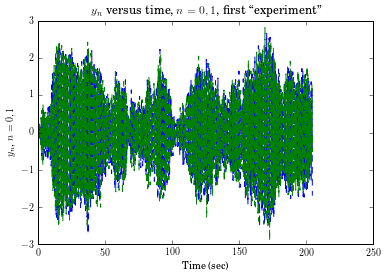

In [4]:
# Simultaneously plot all outputs resulting from the first excitation
# This really makes no practical sense to do... but this is how you do it. 
# Note that we have to swap axes since we want to plot along the 2nd dimension (1)
# but pyplot.plot plots along the first (0th) dimension. The notation used for data 
# mores sense when plotting all outputs on the same dimension in the next cell. 
plt.plot(tin,sp.swapaxes(Yout[:,:,0],0,1))
plt.xlabel('Time (sec)')
plt.ylabel('$y_n$, $n = 0, 1$')
plt.title('$y_n$ versus time, $n = 0, 1$, first ``experiment"')

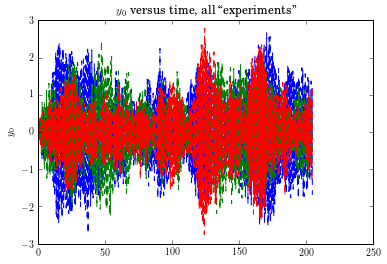

In [5]:
# Simultaneously plot all outputs resulting from the first excitation
plt.plot(tin,Yout[0,:,:])
plt.ylabel('$y_0$')
plt.title('$y_0$ versus time, all ``experiments"')

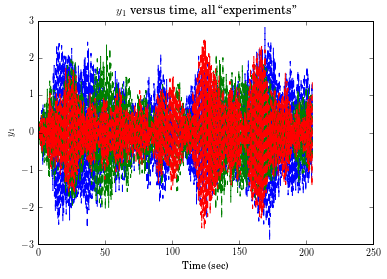

In [6]:
plt.plot(tin, Yout[1,:,:])
plt.xlabel('Time (sec)')
plt.ylabel('$y_1$')
plt.title('$y_1$ versus time, all ``experiments"')

In [7]:
vt.hanning(Yout[0,:,:]).shape

2
length = 2
(2048, 3)
Swapping axes temporarily to be compliant with expectations. I'll fix them in your result


(2048, 3)

2
length = 2
(2048, 3)
Swapping axes temporarily to be compliant with expectations. I'll fix them in your result


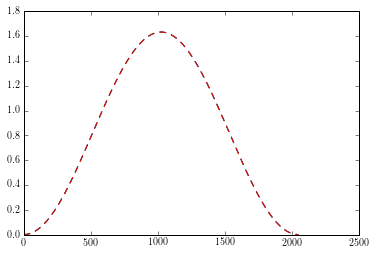

In [8]:
plt.plot(vt.hanning(Yout[0,:,:]))

3


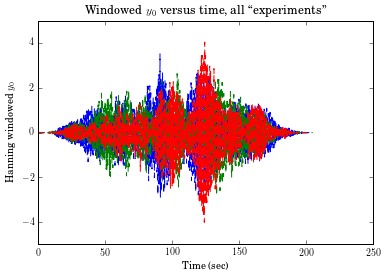

In [9]:
# Here we are windowing the first output. Note that [0,:,:] strips off the first dimension
# If hanning is applied to Yout[0,:,:] it will fail to operate as expected because the first 
# dimension (0) is now the time index, where Hanning expects it to be the second. 
# The code should be improved to allow application to a desired index. For another day...
plt.plot(tin, vt.hanning(Yout)[0,:,:]*Yout[0,:,:])
plt.xlabel('Time (sec)')
plt.ylabel('Hanning windowed $y_0$')
plt.title('Windowed $y_0$ versus time, all ``experiments"')

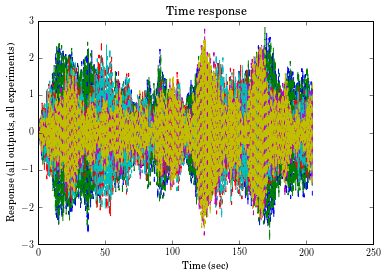

In [10]:
# Note that each layer is a new dataset. Here we plot all 3 datasets on top of each other, 
# numbers 0, 1 and 2, for all outputs

plt.plot(tin,np.transpose(Yout[:,:,0]))
plt.plot(tin,np.transpose(Yout[:,:,1]))
plt.plot(tin,np.transpose(Yout[:,:,2]))
plt.title('Time response')
plt.xlabel('Time (sec)')
plt.ylabel('Response (all outputs, all experiments)')

2
length = 2
(2, 2048)
2
length = 2
(2, 2048)
2
length = 2
(2, 2048)


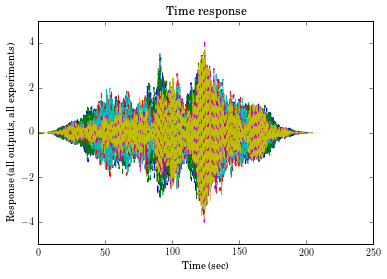

In [12]:
# Note that each layer is a new dataset. Here we plot all 3 datasets on top of each other, 
# numbers 0, 1 and 2

plt.plot(tin,sp.transpose(vt.hanning(Yout[:,:,0])*Yout[:,:,0]))
plt.plot(tin,sp.transpose(vt.hanning(Yout[:,:,1])*Yout[:,:,1]))
plt.plot(tin,sp.transpose(vt.hanning(Yout[:,:,2])*Yout[:,:,2]))
plt.title('Time response')
plt.xlabel('Time (sec)')
plt.ylabel('Response (all outputs, all experiments)')

2
length = 2
(2048, 3)
Swapping axes temporarily to be compliant with expectations. I'll fix them in your result
2
length = 2
(2048, 3)
Swapping axes temporarily to be compliant with expectations. I'll fix them in your result


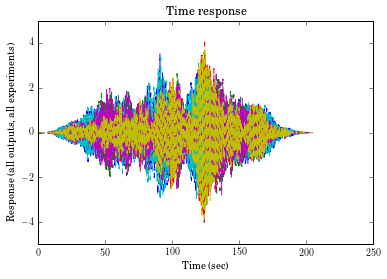

In [13]:
# Note that each layer is a new dataset. Here we plot all 3 datasets on top of each other, 
# numbers 0, 1 and 2

plt.plot(tin,vt.hanning(Yout[0,:,:])*Yout[0,:,:])
plt.plot(tin,vt.hanning(Yout[1,:,:])*Yout[1,:,:])
plt.title('Time response')
plt.xlabel('Time (sec)')
plt.ylabel('Response (all outputs, all experiments)')

Swapping axes temporarily to be compliant with expectations. I'll fix them in your result
Swapping axes temporarily to be compliant with expectations. I'll fix them in your result


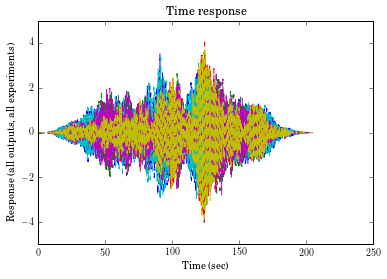

In [14]:
# Note that each layer is a new dataset. Here we plot all 3 datasets on top of each other, 
# numbers 0, 1 and 2

plt.plot(tin,vt.window(Yout[0,:,:], windowname = 'hanning')*Yout[0,:,:])
plt.plot(tin,vt.window(Yout[1,:,:], windowname = 'hanning')*Yout[1,:,:])
plt.title('Time response')
plt.xlabel('Time (sec)')
plt.ylabel('Response (all outputs, all experiments)')

Working up until this point. 

In [ ]:
plt.plot(vt.window(Yout[0,:,:], windowname = 'flatwin'))

In [ ]:
len(sp.expand_dims(Yout[0,:,:],0).shape)

In [ ]:
plt.plot(vt.window(100, window = 'flatwin'))

In [ ]:
N = 50
(0.42-0.5*np.cos(2.*np.pi*(np.arange(N)+.5)/(N))+.08*np.cos(4.*np.pi*(np.arange(N)+.5)/(N)))*np.sqrt(5000/1523)

In [ ]:
np.cos(np.pi*(np.arange(N)+.5)*1.2)

In [ ]:
Ucomb.shape

In [ ]:
#Yout=Yout*np.std(Ucomb)/np.std(Yout)#40 I don't recall what this does. Normalizes some amplitudes, clearly.
#plt.title('time response')
#plt.show()
#vt.hanning(Yout)
freq_vec, Pxx = vt.asd(Yout, tin, window="hanning", ave=bool(True))
freq_vec, Pyy = vt.asd(Ucomb, tin, window="hanning", ave=bool(True))

freq_vec, Pxy = vt.crsd(sp.expand_dims(Yout[0,:,:],0), Ucomb, tin, window="hanning", ave=bool(True))
Pxx.shape

In [ ]:
abs(sp.sqrt(-1))

In [ ]:
plt.plot(freq_vec,20*sp.log10(abs(Pxx[0,:]/Pxy[0,:])),'-g')
plt.plot(freq_vec,20*sp.log10(abs(Pxy[0,:]/Pyy[0,:])),'-b')

In [ ]:
Pxx[0,0:10,0]

In [ ]:
freq_vec.shape

In [ ]:
plt.plot(sp.transpose(freq_vec), 20*sp.log10(Pxx[0,:,0]))
plt.title('Raw ASDs')
plt.show()

In [ ]:
freq_vec, Pxx = vt.asd(Yout, tin, window="hanning", ave=bool(True))
print(freq_vec.shape)
print((20*np.log10(Pxx)).shape)
print(Pxx.shape)
plt.plot(freq_vec, 20*np.log10(Pxx))
plt.title('Averaged ASDs')
plt.show()

In [ ]:
f, Txy1, Txy2, coh, Txyv = vt.frfest(Yout, Ucomb, t, Hv=bool(True))
#fig_amp,=plt.plot(f[0,:],20*np.log10(np.abs(Txy1[0,:])),legend='$H_1$',f[0,:],20*np.log10(np.abs(Txy2[0,:])),legend='$H_2$',f[0,:],20*np.log10(np.abs(Txyv[0,:])),legend='$H_v$')
(line1, line2, line3) = plt.plot(f[0,:],20*np.log10(np.abs(Txy1[0,:])),f[0,:],20*np.log10(np.abs(Txy2[0,:])),f[0,:],20*np.log10(np.abs(Txyv[0,:]))) 
plt.title('FRF of ' + str(Yout.shape[2]) + ' averages.')
plt.legend((line1,line2,line3),('$H_1$','$H_2$','$H_v$'))
plt.show()
plt.plot(f[0,:],180.0/np.pi*np.unwrap(np.angle(Txy1[0,:])),f[0,:],180.0/np.pi*np.unwrap(np.angle(Txy2[0,:])),f[0,:],180.0/np.pi*np.unwrap(np.angle(Txyv[0,:]))) 
plt.title('FRF of ' + str(Yout.shape[2]) + ' averages.')
plt.show()
plt.plot(f[0,:],coh[0,:])
plt.show()
vt.frfplot(f,Txy1,freq_max=3.5)

In [ ]:
freq_vec.shape


In [ ]:
plt.plot(freq_vec, 20*np.log10(Pxx))

In [ ]:
Pxx.shape

In [ ]:
vt.hanning(Yout[:,:,0]).shape

In [ ]:
np.linspace(0,1,4).shape

In [ ]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import vttools as vt
from numpy import linalg
sample_freq = 1e3
tfinal = 5
sig_freq=1#50
A=10
noise_power = 0.0001 * sample_freq / 2
noise_power = A/1e2
time = np.arange(0,tfinal,1/sample_freq)
x = A*np.sin(2*np.pi*sig_freq*time)
print(x.shape)
x_sig = x + np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
print(x_sig.shape)
plt.subplot(2,1,1)
plt.plot(time,x_sig)
plt.title('Time history')
plt.xlabel('Time (sec)')
plt.ylabel('$x(t)$')
freq_vec, Pxx = vt.asd(x, time, window="hanning", ave=bool(False))
plt.subplot(2,1,2)
#plt.plot(freq_vec[0,:], 20*np.log10(Pxx[0,:,:]))
plt.ylim([-400, 100])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [ ]:
x_sig.shape


In [ ]:
import vttools as vt

In [ ]:
vt.hanning(4).shape

In [ ]:
a=vt.hanning(5)

win=vt.hanning(a)


In [ ]:
import numpy as np

In [ ]:
print('reshape is NOT what you want. You want SWAPAXES')
b = np.hstack((np.reshape(a,(-1,1)),np.reshape(a,(-1,1))))


In [ ]:
b.shape

In [ ]:
win2 = vt.hanning(b)

In [ ]:
win2.shape

In [ ]:
c=np.dstack((b,b))

In [ ]:
c

In [ ]:
win3=vt.hanning(c)

In [ ]:
win3.shape

In [ ]:
win3